In [21]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
from config import weather_api_key
import requests
from scipy.stats import linregress



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0436a0ed4fdac90bb050eeda2e0b2621


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind
                          
                          })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mayo
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kamaishi
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | acapulco
Processing Record 9 of Set 1 | pacific grove
Processing Record 10 of Set 1 | saint-francois
Processing Record 11 of Set 1 | high level
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | surt
Processing Record 14 of Set 1 | gamba
Processing Record 15 of Set 1 | poum
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | makakilo city
Processing Record 18 of Set 1 | koygorodok
Processing Record 19 of Set 1 | trebisacce
Processing Record 20 of Set 1 | penarroya-pueblonuevo
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | amderma
City not found. Skipping

Processing Record 36 of Set 4 | marmaris
Processing Record 37 of Set 4 | jamestown
Processing Record 38 of Set 4 | geraldton
Processing Record 39 of Set 4 | shestakovo
Processing Record 40 of Set 4 | esperantinopolis
Processing Record 41 of Set 4 | chapais
Processing Record 42 of Set 4 | nelson bay
Processing Record 43 of Set 4 | kawalu
Processing Record 44 of Set 4 | kieta
Processing Record 45 of Set 4 | kuzino
Processing Record 46 of Set 4 | sorvag
City not found. Skipping...
Processing Record 47 of Set 4 | abha
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | siirt
Processing Record 50 of Set 4 | lavrentiya
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | halifax
Processing Record 3 of Set 5 | aklavik
Processing Record 4 of Set 5 | avera
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | abomsa
Processing Record 7 of Set 5 | ulety
Processing Record 8 of Set 5 | plouzane
Processing Record 9 of Set 5 | ramanathapuram
Proce

Processing Record 26 of Set 8 | trinec
Processing Record 27 of Set 8 | abu jubayhah
City not found. Skipping...
Processing Record 28 of Set 8 | keti bandar
Processing Record 29 of Set 8 | emerald
Processing Record 30 of Set 8 | south sioux city
Processing Record 31 of Set 8 | keetmanshoop
Processing Record 32 of Set 8 | urcos
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | winnemucca
Processing Record 35 of Set 8 | sal rei
Processing Record 36 of Set 8 | uruzgan
Processing Record 37 of Set 8 | arman
Processing Record 38 of Set 8 | bolobo
Processing Record 39 of Set 8 | huangzhai
Processing Record 40 of Set 8 | uniao
Processing Record 41 of Set 8 | san jeronimo
Processing Record 42 of Set 8 | sola
Processing Record 43 of Set 8 | tazovskiy
Processing Record 44 of Set 8 | broken hill
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | buchanan
Processing Record 47 of Set 8 | khash
Processing Record 48 of Set 8 | santa barbara
Processing Record 49

Processing Record 15 of Set 12 | arlit
Processing Record 16 of Set 12 | mitsamiouli
Processing Record 17 of Set 12 | chisinau
Processing Record 18 of Set 12 | kropotkin
Processing Record 19 of Set 12 | ardabil
Processing Record 20 of Set 12 | bahia de caraquez
Processing Record 21 of Set 12 | yangjiang
Processing Record 22 of Set 12 | santa maria
Processing Record 23 of Set 12 | tilichiki
Processing Record 24 of Set 12 | nome
Processing Record 25 of Set 12 | humaita
Processing Record 26 of Set 12 | tecoanapa
Processing Record 27 of Set 12 | coahuayana
Processing Record 28 of Set 12 | umm lajj
Processing Record 29 of Set 12 | srivardhan
Processing Record 30 of Set 12 | mindelo
Processing Record 31 of Set 12 | katherine
Processing Record 32 of Set 12 | nevsehir
Processing Record 33 of Set 12 | norrtalje
Processing Record 34 of Set 12 | oistins
Processing Record 35 of Set 12 | saint-georges
Processing Record 36 of Set 12 | sana
Processing Record 37 of Set 12 | beloha
Processing Record 38 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-02-19 17:39:23,42.60,-73.97,39.00,40,75,19.46
1,Mayo,US,2020-02-19 17:39:51,38.89,-76.51,48.99,39,1,10.29
2,Cherskiy,RU,2020-02-19 17:40:05,68.75,161.30,-28.14,96,84,6.29
3,Rikitea,PF,2020-02-19 17:40:05,-23.12,-134.97,78.80,79,5,15.10
4,Kamaishi,JP,2020-02-19 17:40:05,39.27,141.88,31.69,82,76,3.53
5,Namibe,AO,2020-02-19 17:40:05,-15.20,12.15,74.35,78,78,10.83
6,Komsomolskiy,UZ,2020-02-19 17:40:06,40.43,71.72,32.00,80,0,6.93
7,Acapulco,MX,2020-02-19 17:40:06,16.86,-99.89,84.20,58,5,5.82
8,Pacific Grove,US,2020-02-19 17:40:06,36.62,-121.92,53.01,76,1,5.82
9,Saint-Francois,FR,2020-02-19 17:40:06,46.42,3.91,48.20,66,75,2.73


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
#6.3.1

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

NameError: name 'time' is not defined

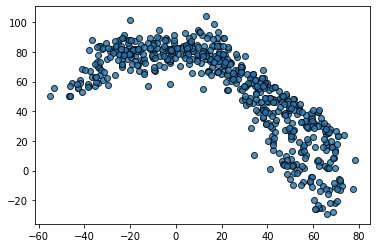

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

NameError: name 'time' is not defined

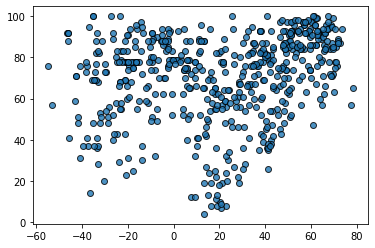

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

NameError: name 'time' is not defined

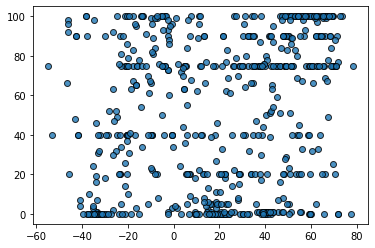

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

NameError: name 'time' is not defined

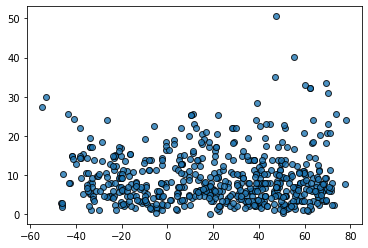

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
#6.4.2

In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
#practice using loc to show all information at INDEX 13
index13 = city_data_df.loc[13]
index13

City                        Gamba
Country                        GA
Date          2020-02-19 17:40:07
Lat                         -2.65
Lng                            10
Max Temp                    80.49
Humidity                       85
Cloudiness                     90
Wind Speed                   8.01
Name: 13, dtype: object

In [18]:
#practice using loc to show information based on filter of ROW VALUE
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
581     True
582     True
583    False
584     True
585     True
Name: Lat, Length: 586, dtype: bool

In [19]:
#return dataframe based on loc filter on row value for latitude
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


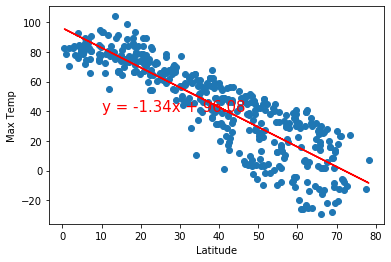

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

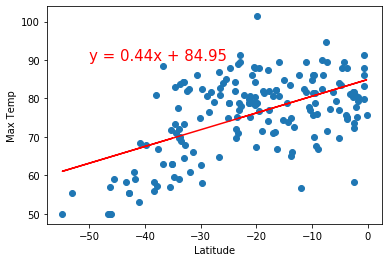

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

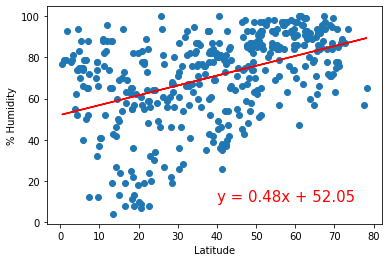

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

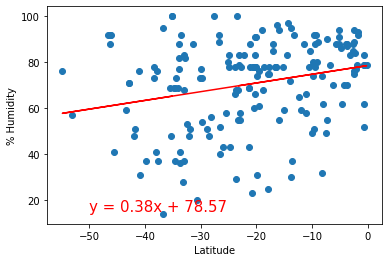

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

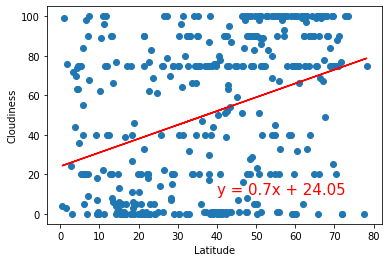

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

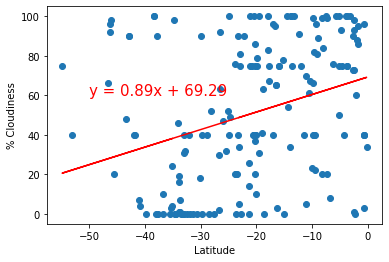

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

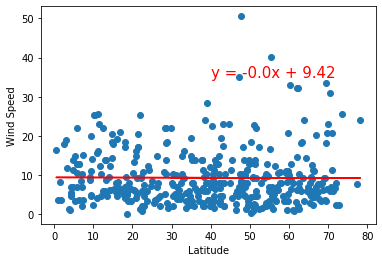

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

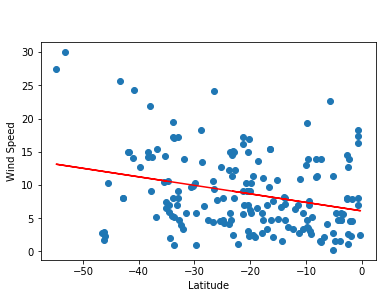

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))